In [1]:
#libraries
import numpy as np 
import pandas as pd
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#preproccesing
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

#models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

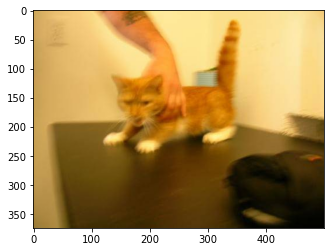

In [2]:
train_path = r'C:\Users\talia\Downloads\train\train/'
train_images = [train_path + i for i in os.listdir(train_path)]
im = cv2.imread(train_images[0])
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
img = im
plt.imshow(img)

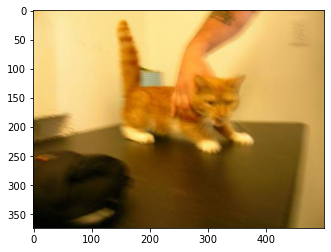

In [3]:
#mirroring
im = cv2.flip(im, 1)
plt.imshow(im);

In [4]:
labels = []
images = []
j = 0
for i in train_images:
    img = cv2.imread(i)
    img = cv2.resize(img, (50,50))
    images.append(pd.Series(img.flatten()))
    if train_images[j][37:40] == 'cat':
        labels.append('cat')
    if train_images[j][37:40] == 'dog':
        labels.append('dog')
    j = j + 1

In [5]:
j = 0
for i in train_images:
    img = cv2.imread(i)
    img = cv2.resize(img, (50,50))
    img_flip = cv2.flip(img, 1)
    images.append(pd.Series(img_flip.flatten()))
    if train_images[j][37:40] == 'cat':
        labels.append('cat')
    if train_images[j][37:40] == 'dog':
        labels.append('dog')
    j = j + 1

In [6]:
labels_df = pd.DataFrame(labels, columns = ['labels'])
labels_df

,labels
0,cat
1,cat
2,cat
3,cat
4,cat
...,...
49995,dog
49996,dog
49997,dog
49998,dog


In [7]:
images_df = pd.DataFrame(images)
images_df

,0,1,2,3,4,5,6,7,8,9,...,7490,7491,7492,7493,7494,7495,7496,7497,7498,7499
0,92,169,208,100,177,216,104,182,225,110,...,2,0,2,2,0,2,2,0,2,2
1,42,43,39,64,58,55,36,40,35,44,...,71,48,52,70,52,57,75,20,26,39
2,53,45,38,61,47,41,64,54,47,69,...,166,48,152,164,2,183,185,10,183,187
3,217,222,221,220,225,224,237,235,235,239,...,205,208,211,210,218,220,220,207,212,215
4,72,109,137,83,120,148,48,87,115,90,...,96,82,105,120,59,91,102,66,90,102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,155,190,200,155,190,200,154,189,199,153,...,75,47,71,73,48,71,73,47,70,72
49996,35,74,88,49,115,113,40,78,102,93,...,104,48,79,102,68,93,112,54,77,100
49997,60,68,75,61,70,77,54,57,62,47,...,94,70,92,119,96,141,169,46,70,94
49998,240,248,253,227,233,255,215,235,244,208,...,89,74,79,94,74,79,94,80,84,99


In [8]:
df = pd.concat([images_df, labels_df], axis=1)
df

,0,1,2,3,4,5,6,7,8,9,...,7491,7492,7493,7494,7495,7496,7497,7498,7499,labels
0,92,169,208,100,177,216,104,182,225,110,...,0,2,2,0,2,2,0,2,2,cat
1,42,43,39,64,58,55,36,40,35,44,...,48,52,70,52,57,75,20,26,39,cat
2,53,45,38,61,47,41,64,54,47,69,...,48,152,164,2,183,185,10,183,187,cat
3,217,222,221,220,225,224,237,235,235,239,...,208,211,210,218,220,220,207,212,215,cat
4,72,109,137,83,120,148,48,87,115,90,...,82,105,120,59,91,102,66,90,102,cat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,155,190,200,155,190,200,154,189,199,153,...,47,71,73,48,71,73,47,70,72,dog
49996,35,74,88,49,115,113,40,78,102,93,...,48,79,102,68,93,112,54,77,100,dog
49997,60,68,75,61,70,77,54,57,62,47,...,70,92,119,96,141,169,46,70,94,dog
49998,240,248,253,227,233,255,215,235,244,208,...,74,79,94,74,79,94,80,84,99,dog


In [9]:
target_counts = df['labels'].value_counts()
target_counts

dog    25000
cat    25000
Name: labels, dtype: int64

<B> we can see that the data is perfectly balanced

# preprocessing of data¶

In [10]:
# Drop the labels column from train dataframe as well as test dataframe
# labels_df - save aside
train = df.drop(["labels"], axis = 1)

# Split the training dataset into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(train, labels_df, test_size=0.2, random_state=42)
print("Number of samples in the train set: ", len(X_train))
print("Number of samples in the validation set: ", len(X_test))

Number of samples in the train set:  40000
Number of samples in the validation set:  10000


In [11]:
# Some more preprocessing
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)

In [12]:
# Normalization
X_train /=255.
X_test /=255.

# PCA  
PCA is actually a very important tool for dimensionality reduction of large data sets.
Reducing the number of components or features may cost the accuracy,but it makes the large data set simpler, easy to explore and visualize. Also, it reduces the complexity of the model which makes the algorithms run faster.

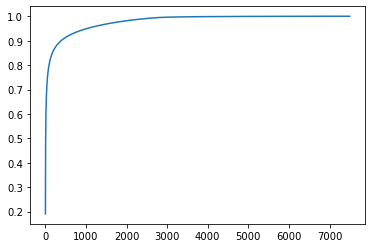

In [13]:
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cumsum)

In [14]:
pca = PCA(n_components = 0.95)
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)

In [15]:
pca.n_components_

1030

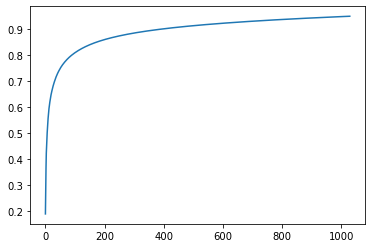

In [16]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cumsum)

## Modeling

In [17]:
X_train_PCA = pd.DataFrame(X_train_reduced)
X_test_PCA = pd.DataFrame(X_test_reduced)

<B> Random Forest Classification

In [18]:
rfc = RandomForestClassifier(n_estimators = 200, random_state = 1)
rfc.fit(X_train_PCA, y_train)
rfc_pred = rfc.predict(X_test_PCA)
print("Random Forest Algo Result : ", metrics.accuracy_score(y_test, rfc_pred)*100)

Random Forest Algo Result :  62.370000000000005


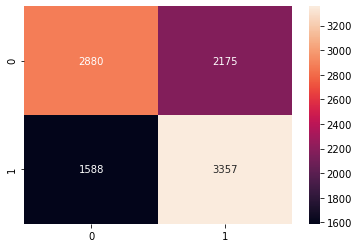

In [19]:
con_mat = confusion_matrix(y_test, rfc_pred)
f, ax = plt.subplots(figsize=(6, 4))
sns.heatmap(con_mat, annot=True, fmt='g')

<B> Logistic Regression

In [20]:
lr=LogisticRegression()
lr.fit(X_train_PCA,y_train)
lr_pred = lr.predict(X_test_PCA)

In [21]:
lr_score = metrics.accuracy_score(y_test, lr_pred)*100
print("Logistic Regression Algo Result : ",lr_score)

Logistic Regression Algo Result :  61.33


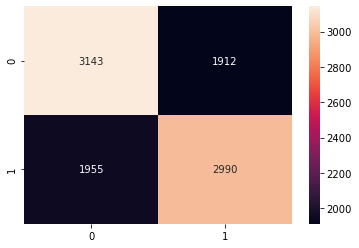

In [22]:
con_mat = confusion_matrix(y_test, lr_pred)
f, ax = plt.subplots(figsize=(6, 4))
sns.heatmap(con_mat, annot=True, fmt='g')

<B> KNN

In [23]:
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train_PCA, y_train)
knn_pred = knn.predict(X_test_PCA)

In [24]:
knn_score = metrics.accuracy_score(y_test, knn_pred)*100
print("KNN Algo Result : ",knn_score)

KNN Algo Result :  60.11


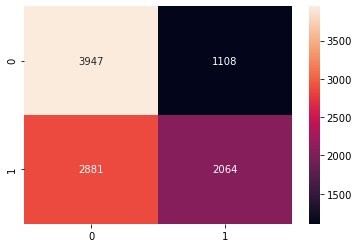

In [25]:
con_mat = confusion_matrix(y_test, knn_pred)
f, ax = plt.subplots(figsize=(6, 4))
sns.heatmap(con_mat, annot=True, fmt='g')

<B> Gaussian Naive Bayes

In [26]:
gnb = GaussianNB()
gnb.fit(X_train_PCA, y_train)
gnb_pred = gnb.predict(X_test_PCA)

In [27]:
gnb_score = metrics.accuracy_score(y_test, gnb_pred)*100
print("Accuracy of Naive Bayes Algo : ", gnb_score)

Accuracy of Naive Bayes Algo :  58.43000000000001


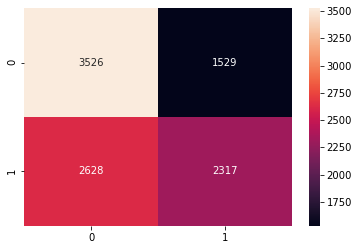

In [28]:
con_mat = confusion_matrix(y_test, gnb_pred)
f, ax = plt.subplots(figsize=(6, 4))
sns.heatmap(con_mat, annot=True, fmt='g')

## Ensemble Learning  
ensemble methods use multiple learning algorithms to obtain better predictive performance than could be obtained from any of the constituent learning algorithms alone. 

<B> Voting Classifier </B>  
A Voting Classifier is a machine learning model that trains on an ensemble of numerous models and predicts an output (class) based on their highest probability of chosen class as the output.
It simply aggregates the findings of each classifier passed into Voting Classifier and predicts the output class based on the highest majority of voting. The idea is instead of creating separate dedicated models and finding the accuracy for each them, we create a single model which trains by these models and predicts output based on their combined majority of voting for each output class.

In [29]:
classifiers = [('Logistic Regression', lr),
               ('KNN', knn),
               ('Gaussian Naive Bayes', gnb),             
               ('Random Forest', rfc)]

In [30]:
for c_name, c in classifiers:
    c.fit(X_train_PCA, y_train)
    preds = c.predict(X_test_PCA)
    print(f'{c_name} accuracy: {accuracy_score(y_test, preds)*100}')

Logistic Regression accuracy: 61.33
KNN accuracy: 60.11
Gaussian Naive Bayes accuracy: 58.43000000000001
Random Forest accuracy: 62.370000000000005


<B> <u>Soft Voting:</u> In soft voting, the output class is the prediction based on the average of probability given to that class. Suppose given some input to three models, the prediction probability for class A = (0.30, 0.47, 0.53) and B = (0.20, 0.32, 0.40). So the average for class A is 0.4333 and B is 0.3067, the winner is clearly class A because it had the highest probability averaged by each classifier.

In [31]:
VC = VotingClassifier(estimators=classifiers, voting='soft')
VC.fit(X_train_PCA, y_train)
preds = VC.predict(X_test_PCA)

In [32]:
soft_vc = accuracy_score(y_test, preds)*100
print(f'Voting Classifier score: {soft_vc}')

Voting Classifier score: 60.58


<B> <u> Hard Voting:</u> In hard voting, the predicted output class is a class with the highest majority of votes i.e the class which had the highest probability of being predicted by each of the classifiers. Suppose three classifiers predicted the output class(A, A, B), so here the majority predicted A as output. Hence A will be the final prediction.

In [33]:
VC = VotingClassifier(estimators=classifiers, voting='hard')
VC.fit(X_train_PCA, y_train)
preds = VC.predict(X_test_PCA)

In [36]:
hard_vc = accuracy_score(y_test, preds)*100
print(f'Voting Classifier score: {hard_vc}')

Voting Classifier score: 62.55


<B> AdaBoost </B>  
AdaBoost, short for Adaptive Boosting, is a statistical classification meta-algorithm. It can be used in conjunction with many other types of learning algorithms to improve performance. The output of the other learning algorithms ('weak learners') is combined into a weighted sum that represents the final output of the boosted classifier. AdaBoost is adaptive in the sense that subsequent weak learners are tweaked in favor of those instances misclassified by previous classifiers.In some problems it can be less susceptible to the overfitting problem than other learning algorithms. The individual learners can be weak, but as long as the performance of each one is slightly better than random guessing, the final model can be proven to converge to a strong learner.

In [37]:
ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=150,
    algorithm="SAMME.R", learning_rate=0.5, random_state=42)
ada_clf.fit(X_train_PCA, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=150, random_state=42)

In [38]:
ada_clf_score = ada_clf.score(X_test_PCA, y_test)*100
print("AdaBoost Algo Result : ",ada_clf_score)

AdaBoost Algo Result :  64.95


<B> XGBoost </B>  
XGBoost is a decision-tree-based ensemble Machine Learning algorithm that uses a gradient boosting framework. In prediction problems involving unstructured data (images, text, etc.) artificial neural networks tend to outperform all other algorithms or frameworks. However, when it comes to small-to-medium structured/tabular data, decision tree based algorithms are considered best-in-class right now.

In [39]:
xgb_reg = xgboost.XGBClassifier(n_estimators = 150,n_jobs = -1,learning_rate = 0.3, seed = 0,eval_metric='mlogloss')
xgb_reg.fit(X_train_PCA, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='mlogloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.3, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=150, n_jobs=-1,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, seed=0, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [40]:
xgb_reg_score = xgb_reg.score(X_test_PCA, y_test)*100
print("XGBoost Algo Result : ",xgb_reg_score)

XGBoost Algo Result :  67.99


# results:

In [41]:
score_list = [lr_score,knn_score,gnb_score,soft_vc,hard_vc,ada_clf_score,xgb_reg_score]
score_df = pd.DataFrame(score_list, index = ['logistic regression','KNN','Gaussian Naive Bayes','soft voting','hard voting','ada boost','xgboost'], columns = ['score'])
score_df

,score
logistic regression,61.33
KNN,60.11
Gaussian Naive Bayes,58.43
soft voting,60.58
hard voting,62.55
ada boost,64.95
xgboost,67.99


### As we can see the best score was with the XGBoost model.